In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [17]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               768 non-null    int64  
 1   glucose                   768 non-null    int64  
 2   bloodpressure             768 non-null    int64  
 3   skinthickness             768 non-null    int64  
 4   insulin                   768 non-null    int64  
 5   bmi                       768 non-null    float64
 6   diabetespedigreefunction  768 non-null    float64
 7   age                       768 non-null    int64  
 8   outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [19]:
df.shape

(768, 9)

In [20]:
df.describe()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [21]:
df.dtypes

pregnancies                   int64
glucose                       int64
bloodpressure                 int64
skinthickness                 int64
insulin                       int64
bmi                         float64
diabetespedigreefunction    float64
age                           int64
outcome                       int64
dtype: object

In [22]:
#checking for duplicate rows
df.duplicated().sum()

0

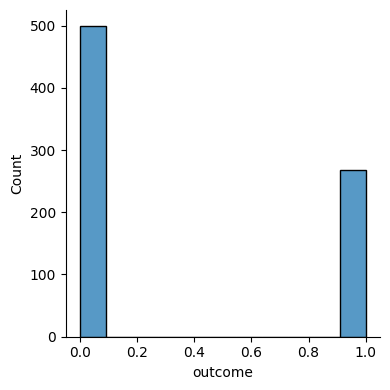

In [45]:
#outlier detection
sns.displot(data=df['outcome'], height=4)

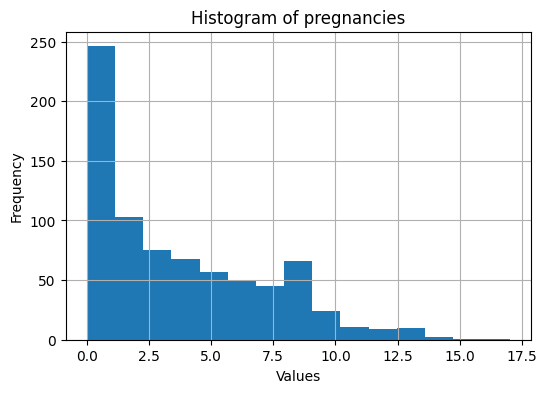

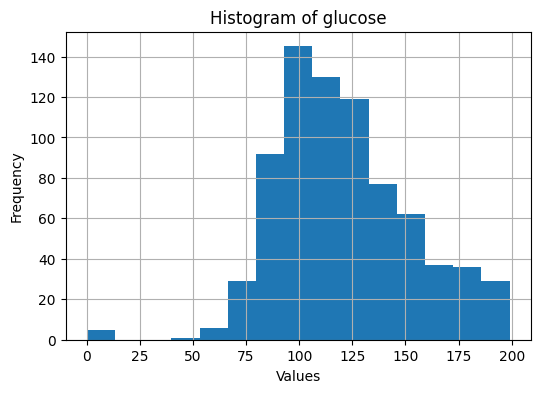

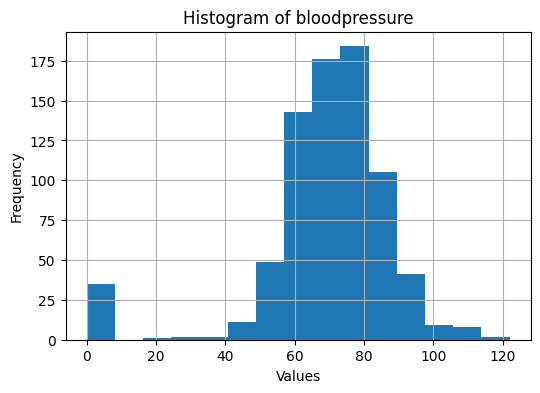

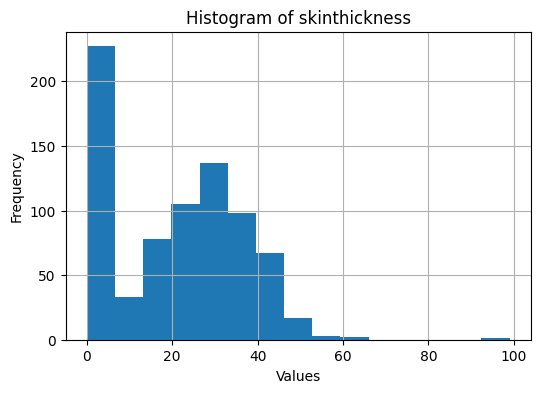

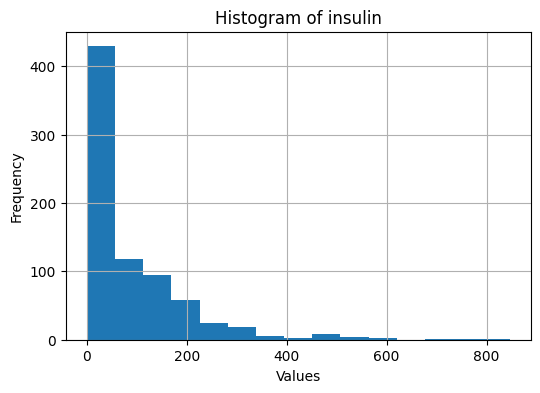

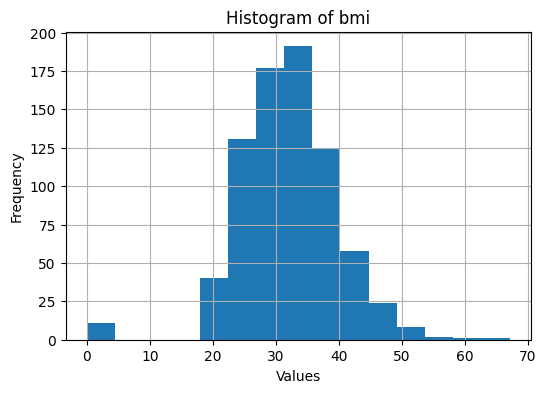

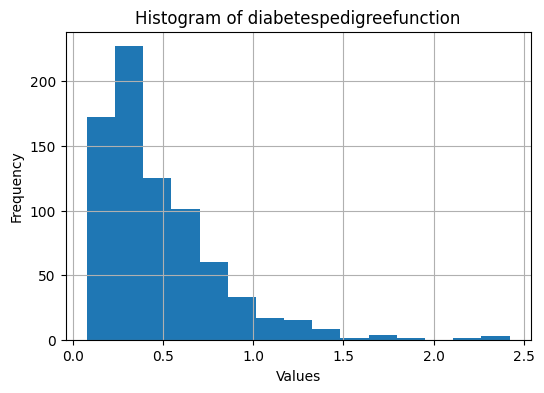

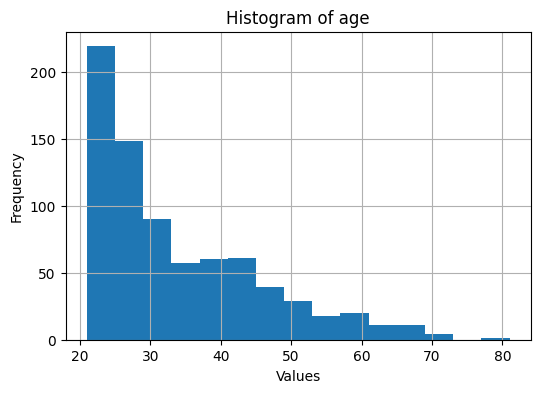

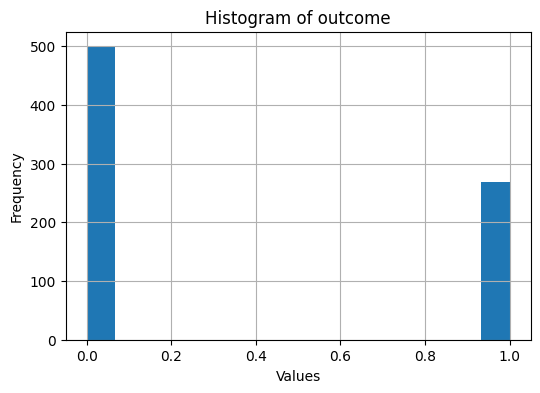

In [47]:
#checking distribution of data
for column in df.columns:
    plt.figure(figsize=(6,4))  
    plt.hist(df[column], bins=15) 
    plt.title(f'Histogram of {column}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [25]:
#using stats to infer data distributions numerically
skewness = stats.skew(df)
kurtosis = stats.kurtosis(df)

for column, skew_val, kurt_val in zip(df.columns, skewness, kurtosis):
            print(f"{column} has skewness: {round(skew_val,3)} and kurtosis: {round(kurt_val,3)}")

pregnancies has skewness: 0.9 and kurtosis: 0.15
glucose has skewness: 0.173 and kurtosis: 0.629
bloodpressure has skewness: -1.84 and kurtosis: 5.139
skinthickness has skewness: 0.109 and kurtosis: -0.524
insulin has skewness: 2.268 and kurtosis: 7.16
bmi has skewness: -0.428 and kurtosis: 3.261
diabetespedigreefunction has skewness: 1.916 and kurtosis: 5.551
age has skewness: 1.127 and kurtosis: 0.631
outcome has skewness: 0.634 and kurtosis: -1.598


**Skewness**: Measures the symmetry of the distribution.
<ul>
    <li>Skewness of 0: Symmetric distribution</li>
    <li>Positive skewness (> 0): Right-skewed distribution</li>
    <li>Negative skewness (< 0): Left-skewed distribution</li>
</ul>
    
**Kurtosis**: Measures the peakedness or flatness of the distribution.
<ul>
    <li>Kurtosis of 0: Similar peakedness as a normal distribution</li>
    <li>Positive kurtosis (> 0): more peaked than normal</li>
    <li>Negative kurtosis (< 0): less peaked than normal</li>
</ul>   

It can be observed that none of the variables have a normal distribution.
Therefore, Spearman's coefficient, instead of Pearson's, will be used to calculate the correlation between them.

<Axes: >

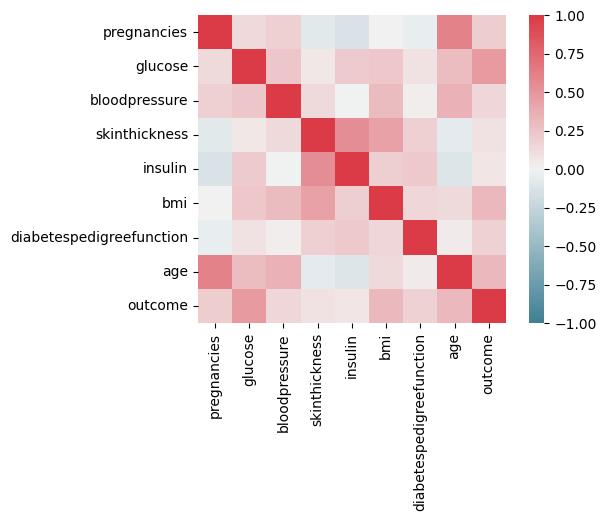

In [26]:
corr = df.corr(method='spearman')
f, ax = plt.subplots(figsize=(6, 4))

sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

Some strong positive correlations can be observed between:
- `age` and `pregnancies`
- `insulin` and `skinthickness`
- `bmi` and `skinthickness`


In [27]:
X = df.drop('outcome', axis=1)
y = df['outcome']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=72)

In [61]:
dec_tree = DecisionTreeClassifier()
dec_tree = dec_tree.fit(X_train, y_train)

y_pred = dec_tree.predict(X_test)

In [62]:
print("Accuracy score:",metrics.accuracy_score(y_test, y_pred))

Accuracy score: 0.71875


**Viewing Feature Importance:**  

Examining the most influential features for the diagnosis

In [31]:
importance = dec_tree.feature_importances_

#creating and sorting a new df
feat_imp_df = pd.DataFrame({'feature': X_train.columns, 'feature importance': importance})

feat_imp_df = feat_imp_df.sort_values(by='feature importance', ascending= False)

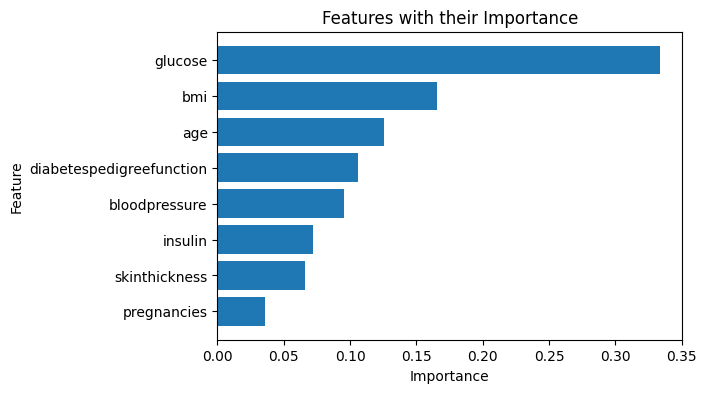

In [32]:
plt.figure(figsize=(6,4))
plt.barh(feat_imp_df['feature'][::-1], feat_imp_df['feature importance'][::-1])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Features with their Importance')
plt.show()

### Hyperparameter Tuning for Better Accuracy

<b>Assessing the Impact of Decision Tree Depth on Model Performance </b>

The goal is to select the optimal depth for the decision tree model and explore how its performance varies with different depths by iterating over values of max_depth ranging from 1 to 9.

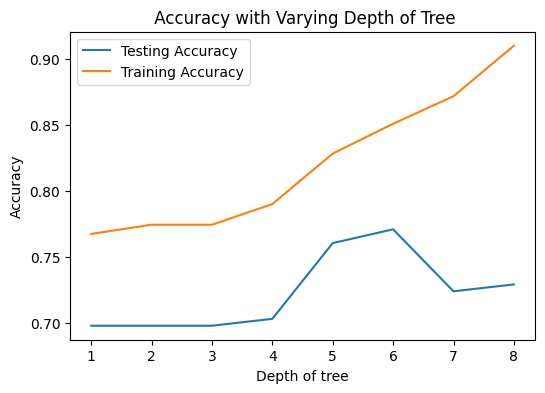

In [48]:
#arrays to store train and test accuracies
depth = np.arange(1, 9)
train_accuracy = np.empty(len(depth))
test_accuracy = np.empty(len(depth))

#iterating over different values of k
for i, k in enumerate(depth):
    dec_tree_new = DecisionTreeClassifier(max_depth=k)

    dec_tree_new.fit(X_train, y_train)

    train_accuracy[i] = dec_tree_new.score(X_train, y_train)

    test_accuracy[i] = dec_tree_new.score(X_test, y_test)

plt.figure(figsize=(6, 4))
plt.title(' Accuracy with Varying Depth of Tree')
plt.plot(depth, test_accuracy, label = 'Testing Accuracy')
plt.plot(depth, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')
plt.show()

It can be observed that the training accuracy rises proportionately with increase in number of trees, which may suggest overfitting.

Conversely, testing accuracy increases sharply moving from 4 to 5, being highest at 6, after which it declines.

### Optimized Model
Selecting a depth of 6, along with an additional parameter 'criterion':

In [84]:
dec_tree_new = DecisionTreeClassifier(criterion="entropy", max_depth= 6)

dec_tree_new = dec_tree_new.fit(X_train,y_train)

y_pred = dec_tree_new.predict(X_test)

print("Accuracy score after optimization:", metrics.accuracy_score(y_test, y_pred))

Accuracy score after optimization: 0.7708333333333334


<b>Accuracy score shows an improvement after hyperparameter tuning.</b>